#Daily Challenge: Exploring the World Happiness Report with Matplotlib

In [139]:
# Import libraries
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
# Allows access to files stored in Google Drive (to avoid relying on local storage)
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/BasesdeDatos/2019.csv'

# Load and Inspect Data

df = pd.read_csv(file_path)

print(df.head())
print(f'\nSize of database: {df.shape[0]} rows, {df.shape[1]} columns')
print()
print(df.info())
print('\nBasic stats on float columns')
print(df.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.5

In [141]:
# DATA PREPROCESSING

# Check missing values
print('Missing values:')
print(df.isnull().sum())

# Check duplicated rows
print(f'\nDuplicates: {df.duplicated().sum()} rows')

df.columns

df = df.rename(columns={
    "Overall rank": "overall_rank",
    "Country or region": "country",
    "Score": "happiness_score",
    "GDP per capita": "gdp_per_capita",
    "Social support": "social_support",
    "Healthy life expectancy": "healthy_life_expectancy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "perceptions_of_corruption"
})

print()
print(df.columns)

print('\nExcept overall_rank and country, all the columns has datatype float. They are numeric and theres is no need to transform them')


Missing values:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Duplicates: 0 rows

Index(['overall_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy', 'freedom', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

Except overall_rank and country, all the columns has datatype float. They are numeric and theres is no need to transform them


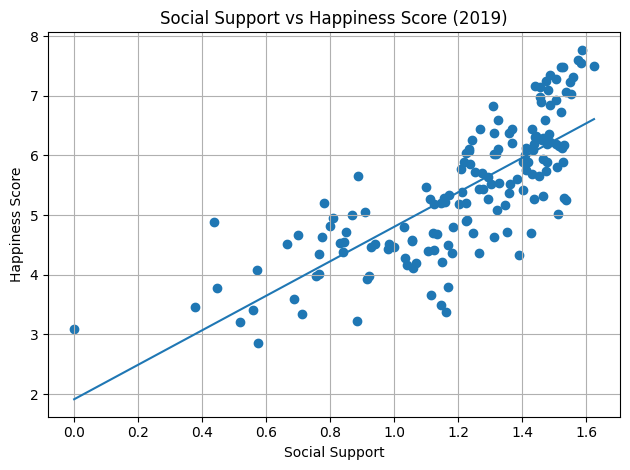

Countries with higher social support tend to have higher happiness scores (positive correlation).


In [142]:
# SOCIAL SUPPORT AND HAPPINESS - scatter plot

# Scatter plot
plt.scatter(df['social_support'], df['happiness_score'])

# Compute linear regression
m, b = np.polyfit(df['social_support'], df['happiness_score'], 1)

# Create values for the trend line
x = np.linspace(df['social_support'].min(), df['social_support'].max(), 100)
y = m * x + b

# Plot trend line
plt.plot(x, y)

plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title("Social Support vs Happiness Score (2019)")
plt.grid(True)
plt.tight_layout()
plt.show()

print('Countries with higher social support tend to have higher happiness scores (positive correlation).')



In [143]:
print(df['country'].unique())

['Finland' 'Denmark' 'Norway' 'Iceland' 'Netherlands' 'Switzerland'
 'Sweden' 'New Zealand' 'Canada' 'Austria' 'Australia' 'Costa Rica'
 'Israel' 'Luxembourg' 'United Kingdom' 'Ireland' 'Germany' 'Belgium'
 'United States' 'Czech Republic' 'United Arab Emirates' 'Malta' 'Mexico'
 'France' 'Taiwan' 'Chile' 'Guatemala' 'Saudi Arabia' 'Qatar' 'Spain'
 'Panama' 'Brazil' 'Uruguay' 'Singapore' 'El Salvador' 'Italy' 'Bahrain'
 'Slovakia' 'Trinidad & Tobago' 'Poland' 'Uzbekistan' 'Lithuania'
 'Colombia' 'Slovenia' 'Nicaragua' 'Kosovo' 'Argentina' 'Romania' 'Cyprus'
 'Ecuador' 'Kuwait' 'Thailand' 'Latvia' 'South Korea' 'Estonia' 'Jamaica'
 'Mauritius' 'Japan' 'Honduras' 'Kazakhstan' 'Bolivia' 'Hungary'
 'Paraguay' 'Northern Cyprus' 'Peru' 'Portugal' 'Pakistan' 'Russia'
 'Philippines' 'Serbia' 'Moldova' 'Libya' 'Montenegro' 'Tajikistan'
 'Croatia' 'Hong Kong' 'Dominican Republic' 'Bosnia and Herzegovina'
 'Turkey' 'Malaysia' 'Belarus' 'Greece' 'Mongolia' 'North Macedonia'
 'Nigeria' 'Kyrgyzstan'

In [144]:
region_map = {
    # Europa
    'Finland': 'Europe','Denmark': 'Europe','Norway': 'Europe','Iceland': 'Europe',
    'Netherlands': 'Europe','Switzerland': 'Europe','Sweden': 'Europe','Austria': 'Europe',
    'Luxembourg': 'Europe','United Kingdom': 'Europe','Ireland': 'Europe','Germany': 'Europe',
    'Belgium': 'Europe','Czech Republic': 'Europe','Malta': 'Europe','France': 'Europe',
    'Spain': 'Europe','Italy': 'Europe','Slovakia': 'Europe','Poland': 'Europe',
    'Lithuania': 'Europe','Slovenia': 'Europe','Romania': 'Europe','Cyprus': 'Europe',
    'Latvia': 'Europe','Estonia': 'Europe','Hungary': 'Europe','Belarus': 'Europe',
    'Greece': 'Europe','North Macedonia': 'Europe','Albania': 'Europe',
    'Bosnia and Herzegovina': 'Europe','Serbia': 'Europe','Moldova': 'Europe',
    'Croatia': 'Europe','Kosovo': 'Europe','Montenegro': 'Europe','Bulgaria': 'Europe',
    'Portugal': 'Europe','Ukraine': 'Europe','Georgia': 'Europe','Armenia': 'Europe',  'Northern Cyprus': 'Europe',
       'Russia': 'Europe',  'Azerbaijan': 'Europe',

    # América del Norte
    'Canada': 'North America','United States': 'North America',

    # América Central + Caribe
    'Mexico': 'Central America','Guatemala': 'Central America','Costa Rica': 'Central America',
    'El Salvador': 'Central America','Honduras': 'Central America','Nicaragua': 'Central America',
    'Panama': 'Central America','Jamaica': 'Central America','Trinidad & Tobago': 'Central America',
    'Haiti': 'Central America','Dominican Republic': 'Central America',

    # América del Sur
    'Brazil': 'South America','Argentina': 'South America','Chile': 'South America',
    'Colombia': 'South America','Uruguay': 'South America','Ecuador': 'South America',
    'Venezuela': 'South America','Bolivia': 'South America','Paraguay': 'South America',
    'Peru': 'South America',

    # Oceanía
    'New Zealand': 'Oceania','Australia': 'Oceania',

    # Asia
    'Israel': 'Asia','United Arab Emirates': 'Asia','Saudi Arabia': 'Asia','Qatar': 'Asia',
    'Kuwait': 'Asia','Thailand': 'Asia','South Korea': 'Asia','Japan': 'Asia','China': 'Asia',
    'Singapore': 'Asia','Malaysia': 'Asia','Philippines': 'Asia','Vietnam': 'Asia',
    'Bhutan': 'Asia','Laos': 'Asia','Pakistan': 'Asia','Bangladesh': 'Asia','Iraq': 'Asia',
    'Iran': 'Asia','Jordan': 'Asia','Lebanon': 'Asia','Uzbekistan': 'Asia',
    'Kazakhstan': 'Asia','Tajikistan': 'Asia','Turkmenistan': 'Asia','Kyrgyzstan': 'Asia',
    'Mongolia': 'Asia','Indonesia': 'Asia','Palestinian Territories': 'Asia',
    'Turkey': 'Asia','Taiwan': 'Asia','Bahrain': 'Asia','Hong Kong': 'Asia','Sri Lanka': 'Asia',
    'Myanmar': 'Asia','India': 'Asia','Afghanistan': 'Asia','Nepal': 'Asia','Cambodia': 'Asia',
    'Syria': 'Asia',

    # África
    'Nigeria': 'Africa','Mauritius': 'Africa','Libya': 'Africa','Morocco': 'Africa',
    'Cameroon': 'Africa','Ghana': 'Africa','Ivory Coast': 'Africa','Benin': 'Africa',
    'Congo (Brazzaville)': 'Africa','Gabon': 'Africa','South Africa': 'Africa',
    'Algeria': 'Africa','Senegal': 'Africa','Somalia': 'Africa','Namibia': 'Africa',
    'Niger': 'Africa','Burkina Faso': 'Africa','Gambia': 'Africa','Kenya': 'Africa',
    'Mauritania': 'Africa','Mozambique': 'Africa','Tunisia': 'Africa','Ethiopia': 'Africa',
    'Swaziland': 'Africa','Uganda': 'Africa','Egypt': 'Africa','Zambia': 'Africa',
    'Togo': 'Africa','Liberia': 'Africa','Comoros': 'Africa','Madagascar': 'Africa',
    'Lesotho': 'Africa','Burundi': 'Africa','Zimbabwe': 'Africa','Botswana': 'Africa',
    'Chad': 'Africa','Congo (Kinshasa)': 'Africa','Mali': 'Africa','Sierra Leone': 'Africa',
    'Central African Republic': 'Africa','South Sudan': 'Africa',     'Guinea': 'Africa',
    'Malawi': 'Africa',
    'Yemen': 'Africa',
    'Rwanda': 'Africa',
    'Tanzania': 'Africa'
}


#Assign each country its main region in a new region column.
df['region'] = df['country'].map(region_map)

print(df.head())
print()

missing = df[df['region'].isnull()]['country'].unique()
print("Países sin región asignada:", missing)



   overall_rank      country  happiness_score  gdp_per_capita  social_support  \
0             1      Finland            7.769           1.340           1.587   
1             2      Denmark            7.600           1.383           1.573   
2             3       Norway            7.554           1.488           1.582   
3             4      Iceland            7.494           1.380           1.624   
4             5  Netherlands            7.488           1.396           1.522   

   healthy_life_expectancy  freedom  generosity  perceptions_of_corruption  \
0                    0.986    0.596       0.153                      0.393   
1                    0.996    0.592       0.252                      0.410   
2                    1.028    0.603       0.271                      0.341   
3                    1.026    0.591       0.354                      0.118   
4                    0.999    0.557       0.322                      0.298   

   region  
0  Europe  
1  Europe  
2  Europ

In [145]:
# how many countries there are per region
print("\nNumber of countries per region:")
print(df['region'].value_counts())


Number of countries per region:
region
Africa             46
Europe             45
Asia               40
Central America    11
South America      10
North America       2
Oceania             2
Name: count, dtype: int64


In [146]:
print(df.columns)

Index(['overall_rank', 'country', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy', 'freedom', 'generosity',
       'perceptions_of_corruption', 'region'],
      dtype='object')


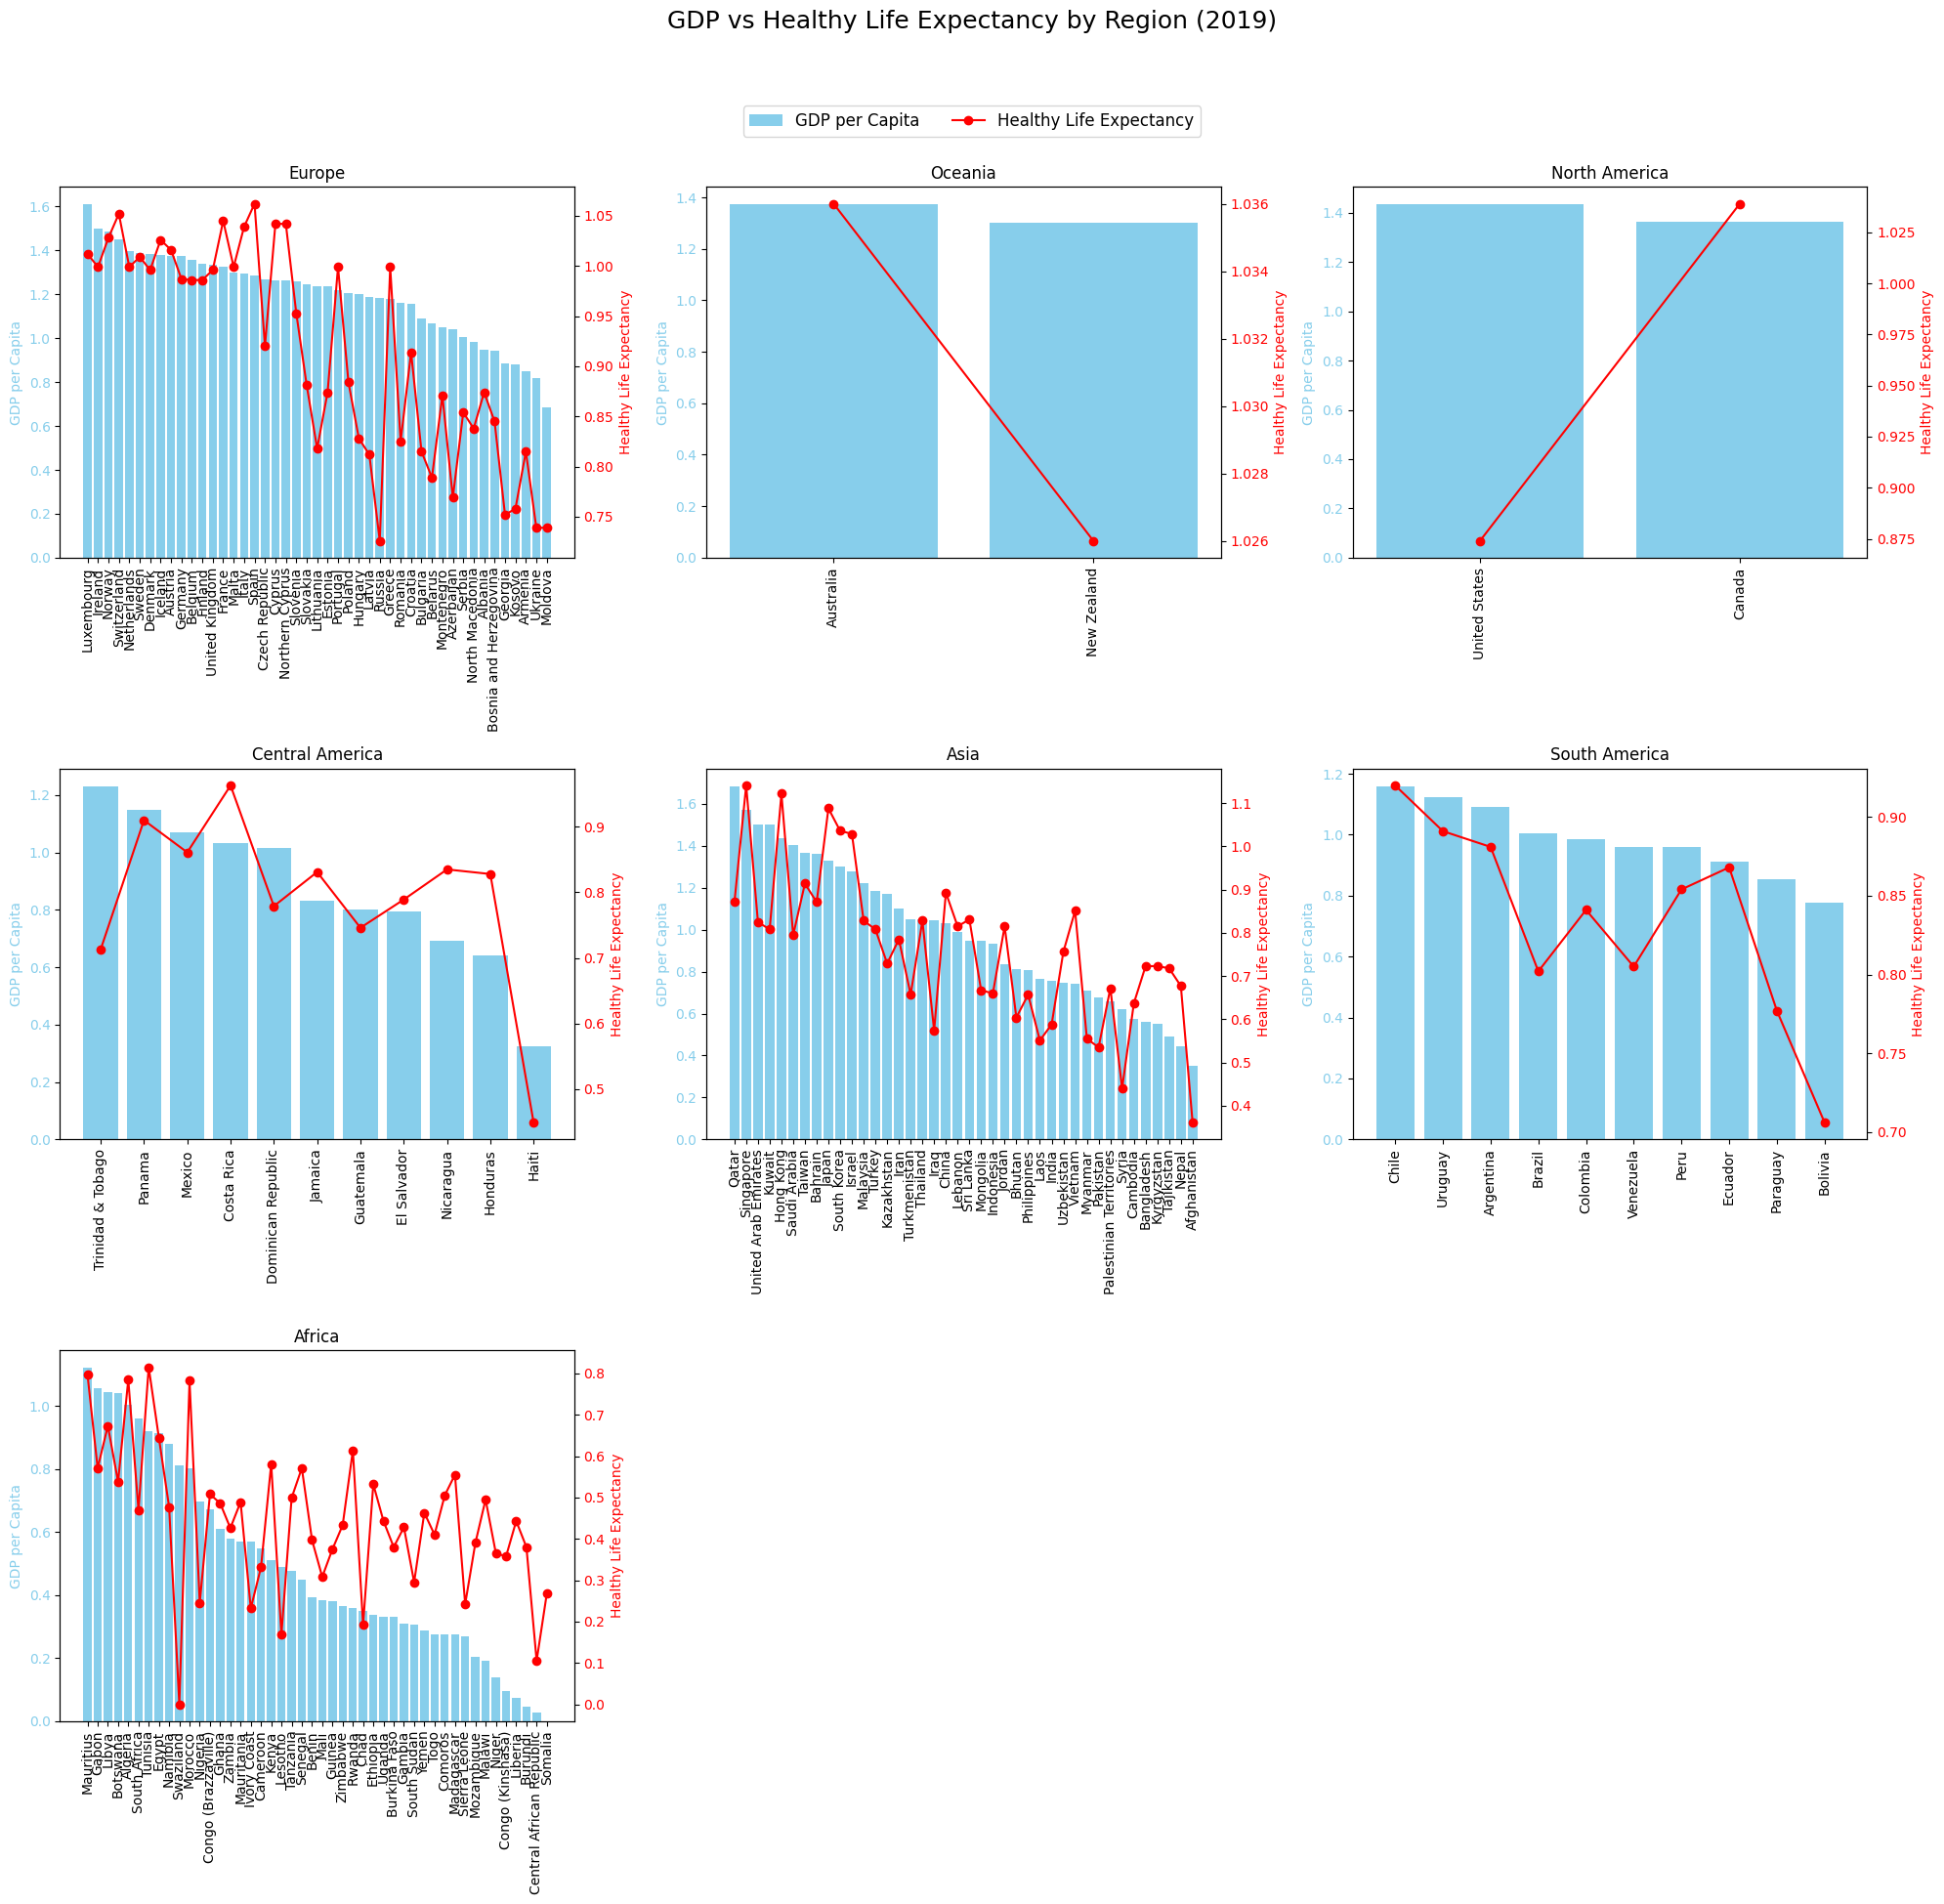

In [147]:
# what the exercise asked for and I failed to do = Now is done

n_regions = len(regions)
cols = 3
rows = int(np.ceil(n_regions / cols))

fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))
axes = axes.flatten()

for i, region in enumerate(regions):

    region_data = df[df['region'] == region]
    region_data = region_data.sort_values('gdp_per_capita', ascending=False)

    ax1 = axes[i]

    # Bars (GDP)
    bars = ax1.bar(region_data['country'],
                   region_data['gdp_per_capita'],
                   color='skyblue',
                   label='GDP per Capita')

    ax1.set_ylabel('GDP per Capita', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax1.set_title(region)
    ax1.tick_params(axis='x', rotation=90)

    # Line (Health)
    ax2 = ax1.twinx()
    line, = ax2.plot(region_data['country'],
                     region_data['healthy_life_expectancy'],
                     color='red',
                     marker='o',
                     label='Healthy Life Expectancy')

    ax2.set_ylabel('Healthy Life Expectancy', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Global legend **outside** the plot area
fig.legend([bars, line],
           ['GDP per Capita', 'Healthy Life Expectancy'],
           loc='upper center',
           ncol=2,
           fontsize=12,
           bbox_to_anchor=(0.5, 1.03))  # ajustamos la posición arriba del título

plt.tight_layout()
plt.suptitle("GDP vs Healthy Life Expectancy by Region (2019)", fontsize=18, y=1.08)
plt.show()



/tmp/ipython-input-3394220453.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_south_america['country'], rotation=45, ha='right')


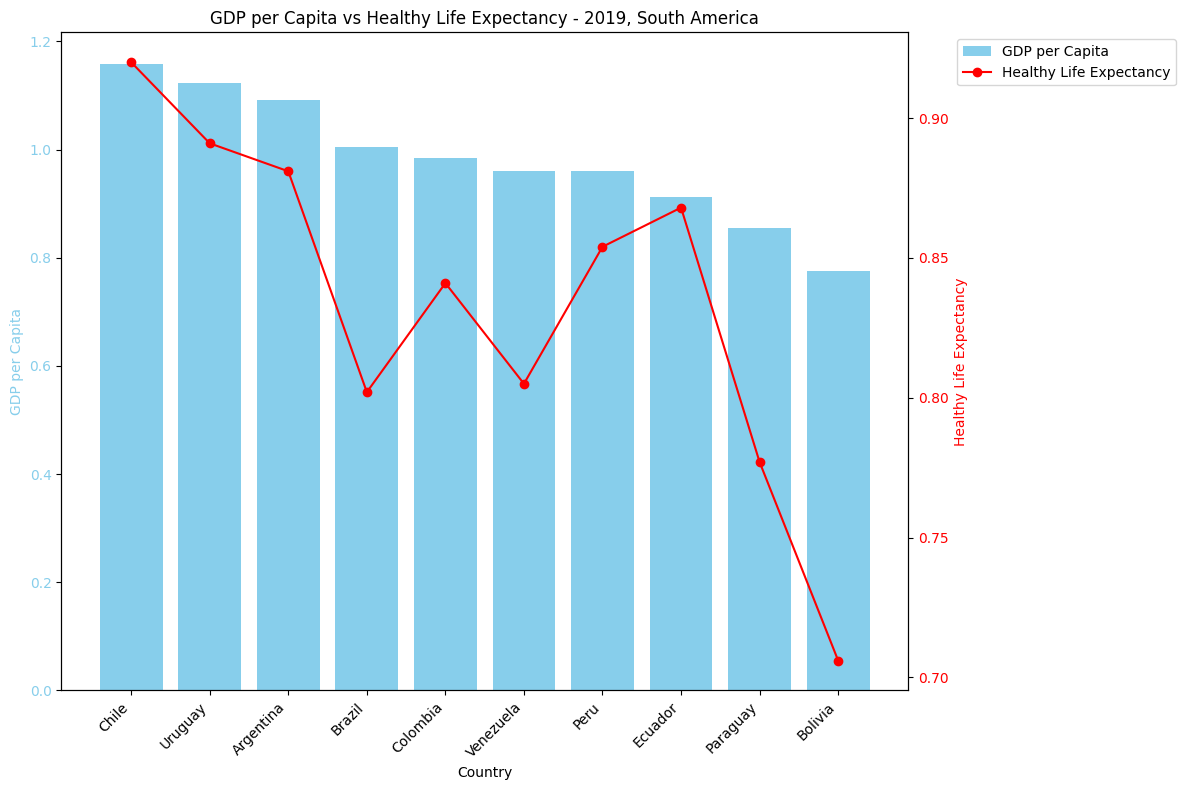

Chile, Uruguay, and Argentina have the highest GDP per capita , and they also exhibit relatively high Healthy Life Expectancy.

Paraguay and Bolivia have the lowest GDP, and their Healthy Life Expectancy is also lower, although it does not decline proportionally to GDP.

The difference in Healthy Life Expectancy is smaller compared to the difference in GDP, indicating that income does not fully explain health status.

In general, economic wealth tends to correlate with better health conditions, but there are social and public policy factors that affect life expectancy beyond GDP.


In [148]:
# Zoom In in South America
df_south_america = df[df['region'] == 'South America']
df_south_america = df_south_america.sort_values('gdp_per_capita', ascending=False)  #sorted according GDP

fig, ax1 = plt.subplots(figsize=(12 , 8))

# Bar plot for GDP per Capita
ax1.bar(df_south_america['country'], df_south_america['gdp_per_capita'], color='skyblue', label='GDP per Capita')
ax1.set_xlabel('Country')
ax1.set_ylabel('GDP per Capita', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(df_south_america['country'], rotation=45, ha='right')

# Second axis for Healthy Life Expectancy (Line plot)
ax2 = ax1.twinx()
ax2.plot(df_south_america['country'], df_south_america['healthy_life_expectancy'], color='red', marker='o', label='Healthy Life Expectancy')
ax2.set_ylabel('Healthy Life Expectancy', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# legend not over the chart
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('GDP per Capita vs Healthy Life Expectancy - 2019, South America')
plt.tight_layout()
plt.show()

print ('''Chile, Uruguay, and Argentina have the highest GDP per capita , and they also exhibit relatively high Healthy Life Expectancy.

Paraguay and Bolivia have the lowest GDP, and their Healthy Life Expectancy is also lower, although it does not decline proportionally to GDP.

The difference in Healthy Life Expectancy is smaller compared to the difference in GDP, indicating that income does not fully explain health status.

In general, economic wealth tends to correlate with better health conditions, but there are social and public policy factors that affect life expectancy beyond GDP.''')
